In [6]:
from qiskit.quantum_info import Statevector, Operator
import numpy as np
from numpy import sqrt
from IPython.display import display, Latex, Math

from qiskit import __version__
print(__version__)

2.2.3


In [7]:
# Computational basis
zero = Statevector([1, 0])
one = Statevector([0, 1])

# X basis
plus = Statevector.from_label("+")
minus = Statevector.from_label("-")

# Y basis
plus_i = Statevector.from_label("r")
minus_i = Statevector.from_label("l")

# Multi-Qubit Operator Practice

### 🔵 1. Apply $H\otimes X$ to the state $\ket{01}$.
Task: 
- Use `Operator.from_label("H") ^ Operator.from_label("X")`
- Verify the resulting statevector

Think about:
- $H\ket{0} = \ket{+}$
- $X\ket{1} = \ket{0}$

In [8]:
operation = Operator.from_label("H") ^ Operator.from_label("X")
state = zero.tensor(one)

display(operation.draw("latex"))
display(state.draw("latex"))
display(state.evolve(operation).draw("latex"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### 🔵 2. Build the operator $Z\otimes H \otimes I$ and apply it to $\ket{+10}$.
Task:
- Construct the 3-qubit operator from $\ket{+}$, $\ket{1}$, and $\ket{0}$ with `^`.
- Build the operator $Z\otimes H\otimes I$ with `^`. 
- Compute the resulting state.

Think about:
- Sign flips from the $Z$ operator.
- Rightmost qubit is index 0.

In [9]:
state = plus ^ one ^ zero
display(state.draw("latex"))

operator = Operator.from_label("Z") ^ Operator.from_label("H") ^ Operator.from_label("I")
display(operator.draw("latex"))

print("Final state:")
display(state.evolve(operator).draw("latex"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Final state:


<IPython.core.display.Latex object>

In [10]:
display((Operator.from_label("Z") ^ Operator.from_label("H")).draw("latex"))

<IPython.core.display.Latex object>

### 🔵 3. Construct the SWAP operator and verify $\text{SWAP}\ket{01}=\ket{10}$.
Task: 
- Build SWAP explicity or with $$\text{SWAP}=\begin{bmatrix*} 1 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \end{bmatrix*}$$
- Apply your SWAP operator to the statevector $\ket{01}$.

Think about:
- SWAP is symmetric.
- SWAP preserves computational bawsis states except exchanging 01 and 01.


In [16]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import DensityMatrix

# Define statevectors as numpy arrays
zero_vec = np.array([[1], [0]])
one_vec = np.array([[0], [1]])

# Function to create a projector |v><w|
def projector(v, w):
    return np.dot(v, w.conj().T)

# SWAP as sum of projectors
SWAP_matrix = (
    projector(np.kron(zero_vec, zero_vec), np.kron(zero_vec, zero_vec)) +   # |00><00|
    projector(np.kron(zero_vec, one_vec), np.kron(one_vec, zero_vec)) +     # |01><10|
    projector(np.kron(one_vec, zero_vec), np.kron(zero_vec, one_vec)) +     # |10><01|
    projector(np.kron(one_vec, one_vec), np.kron(one_vec, one_vec))         # |11><11|
)

# Convert to Qiskit Operator
swap_op = Operator(SWAP_matrix)
print("SWAP operator as matrix:")
display(swap_op.draw("latex"))

# Apply SWAP to |01> statevector
initial_state = zero.tensor(one)
final_state = initial_state.evolve(swap_op)

print("Initial statevector:")
display(initial_state.draw("latex"))
print("Final statevector:")
display(final_state.draw("latex"))

SWAP operator as matrix:


<IPython.core.display.Latex object>

Initial statevector:


<IPython.core.display.Latex object>

Final statevector:


<IPython.core.display.Latex object>

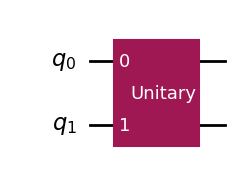

In [19]:
# Extra - Apply to a circuit
qc = QuantumCircuit(2)
qc.unitary(swap_op,[0, 1])
qc.draw("mpl")